# BL40A2030 Wireless Communication Networks

## Week 5 - Assignment

### Author: Jesse Peltola

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings

warnings.filterwarnings('ignore')

**1. (Scaling laws) Plot the throughput capacity for random networks with immobile nodes considering both the protocol and the physical model. Eq.(22) and (23) from [5].**

(a) What does this result mean in terms of how much bits per second can flow in the network when the number of nodes increases?

(b) Cite two ways to improve the throughput capacity of wireless networks that is given in [5]. Make a brief comment with your own words about these two solutions (pro and con). 

*Hint: The "big O" [notation](https://en.wikipedia.org/wiki/Big_O_notation) provides asymptotic boundaries of functions. In other words, what happens with the function when $n$ grows large (to infinity). It is not the function but lower and/or upper bounds. For example, the plot I wish tells that the throughput asymptotically behaves with the number of nodes in the network. In this case, the throughput capacity scales down with this number following the equations. In this sense, $W$ is a constant so one can set $W=1$ (bits/s). Note that the equations are the same, telling that they have indeed the same scaling in throughput capacity. In other words, both models have the same fundamental limit for random networks (what is not the case for arbitrary -- i.e. I decide where to put the nodes -- networks).*



Text(0, 0.5, 'Capacity')

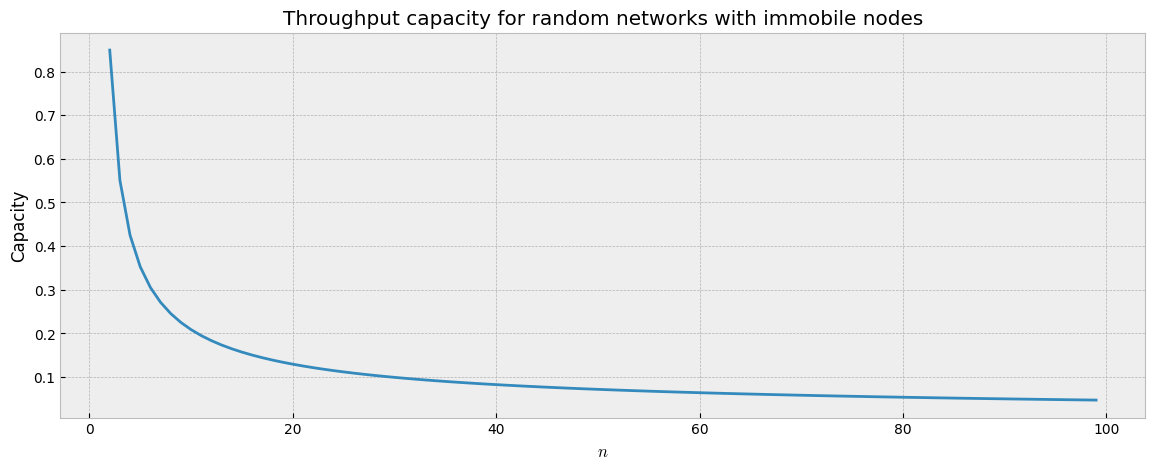

In [2]:
n = np.arange(0,100)
W = 1

plt.figure(figsize=(14, 5))
P = [W/np.sqrt(i*np.log(i)) for i in n]

plt.plot(P)
plt.title("Throughput capacity for random networks with immobile nodes")
plt.xlabel("$n$")
plt.ylabel("Capacity")

a) The result indicates that the bits per second that can flow through the network while the number of nodes increase, is $O(1/(\sqrt n))$. This means that the more nodes are added in two random networks without knowing the node placement, the less the maximum theoretical throughput of the network is.    

b) As we know that the two networks are bounded with $O(1/(\sqrt n))$, so we can improve the throughput of the network by increasing the W. The capacity can be improved by positioning the nodes in the network, and the throughput of the network would be $O(\sqrt n)$. 


**2. (Interference empirical distribution) Let us analyze the effect of the newtork size in the interference distribution for the same network density (expected number of interferers per unit of area). Follow the implementation of the "path-loss model 2" given in the tutorial. Consider the pathloss exponent $\alpha=3$, the density of $0.1$ node$/m^2$ and a square network of $L \times L$. Plot the empirical distribution for:** 

(a) $L = 5$ 

(b) $L = 10$

(c) $L = 20$

(d) $L = 100$

(e) Do you see any difference? Why?

*Hint: To keep the same density: mean_poisson = density $\times L^2$*


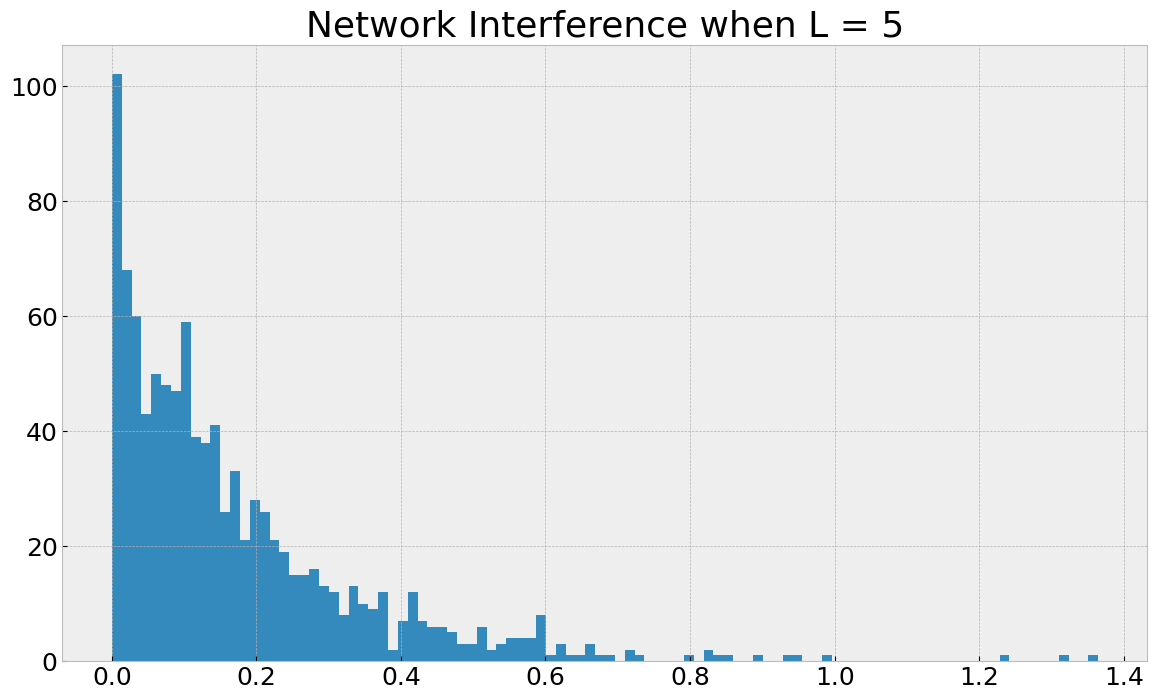

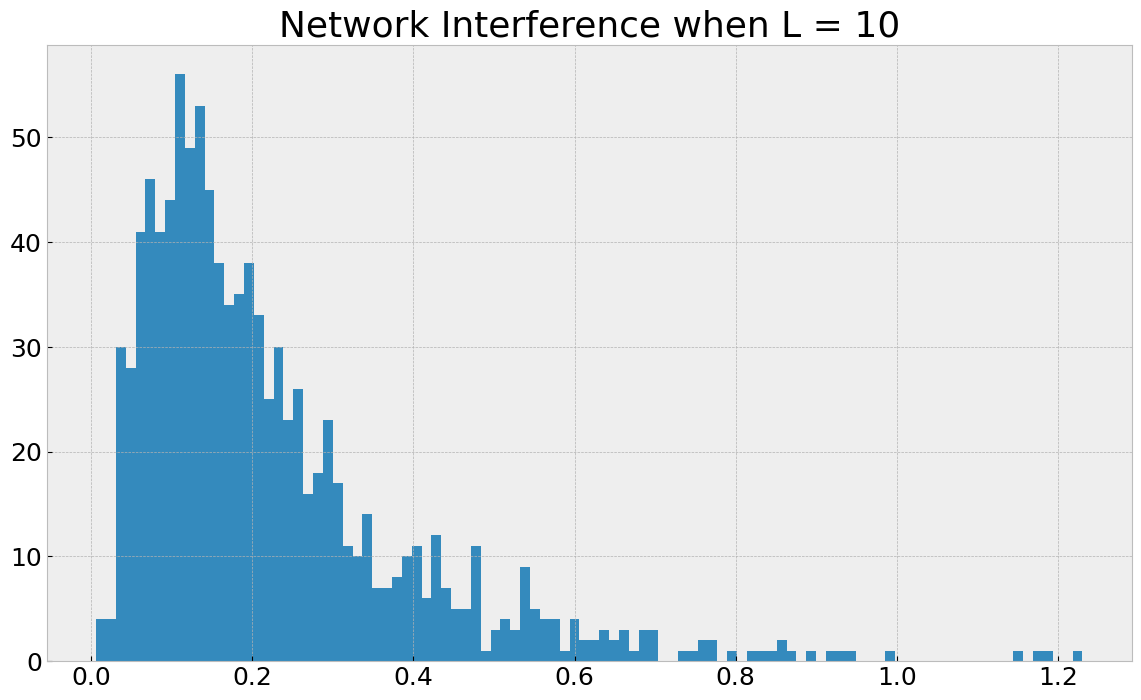

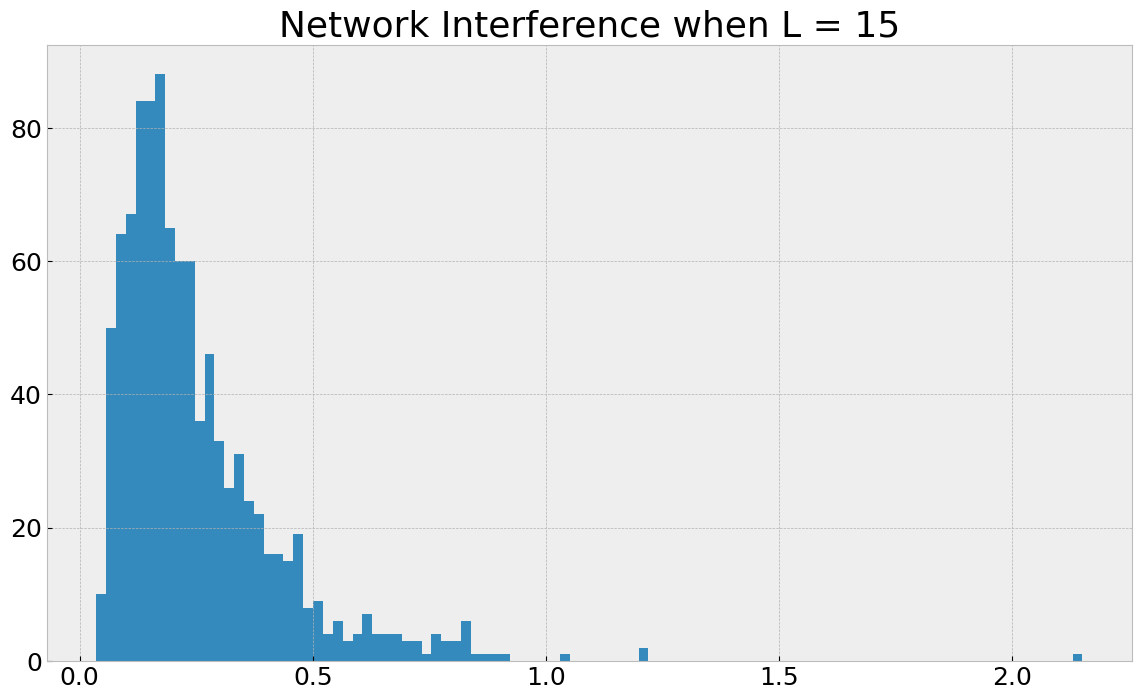

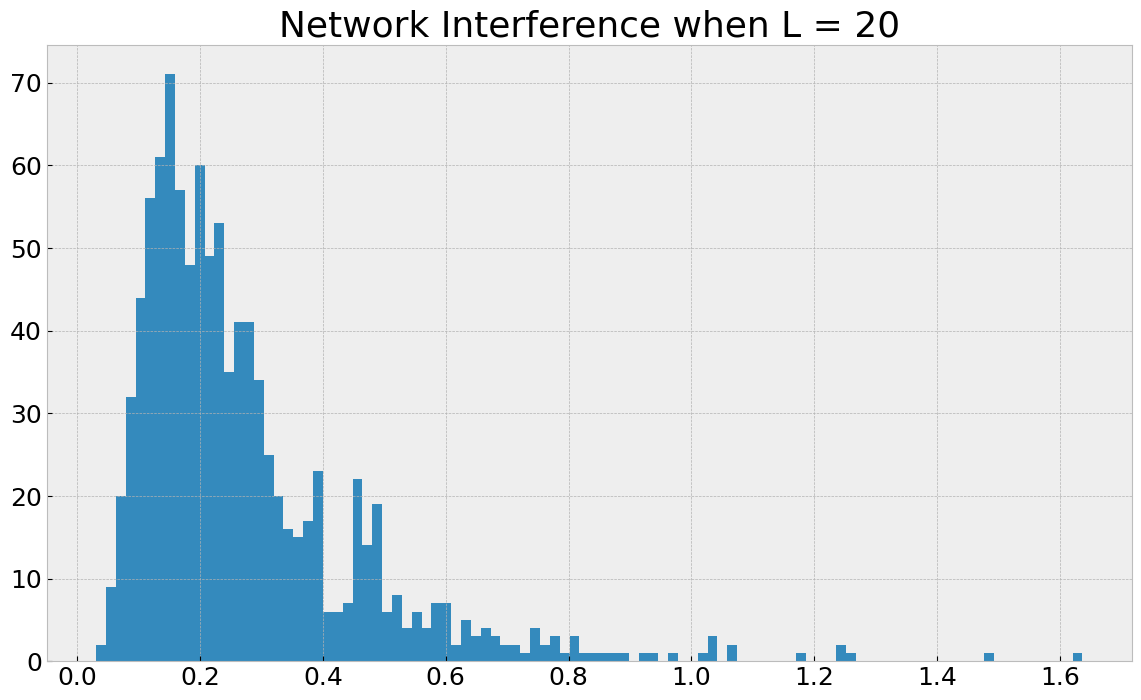

In [10]:
#P_i = (1+d_i)^-alpha

def calculate_interference(L, density, trials):
    mean_poisson = density * L ** 2
    
    #Path-loss exponent
    alpha = 3
    n = np.random.poisson(mean_poisson)
    interference = np.zeros(trials)
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [(1+distance_rx[i])**(-alpha) for i in range(n)]
        interference[j] = np.sum(interference_i)
    
    return interference
 
        
        

def main():
    
    #trials
    trials = 1000
    #Network size (square)
    L = [5, 10, 15, 20]
    density = 0.1
    for size in L:
        interference = calculate_interference(size, density, trials) 
        ###Plot
        plt.rcParams.update({'font.size': 18})
        plt.figure(figsize=(14,8))
        plt.hist(interference,bins=100)
        plt.title(f"Network Interference when L = {size}")
        plt.show()
if __name__ == '__main__':
    main()


e) 

According the results, there is difference between network size. L = 5 has the least interference and the distribution is centered in left. The bigger L is, the more interference there is as we can see from the figures. 

**3. (Outage probability) Follow the tutorial to investigate the effect of the SIR threshold $\beta$ in the outage probability, defined as (1 - success probability).**

(a) Plot the outage probability as a function of $\beta>1$ for: d=1, alpha=4, L=10, mean_poisson= 10, trials=10000. Plot $\beta$ from 1 to 15.


In [2]:
def suc_prob(d, beta, alpha, L, mean_poisson, trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):
        
        n = np.random.poisson(mean_poisson)
        
        position_x_realization = np.random.uniform(-L/2,L/2,n)
        position_y_realization = np.random.uniform(-L/2, L/2, n)
        
        position_x_realization_t = np.transpose(position_x_realization)
        position_y_realization_t = np.transpose(position_y_realization)
        
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i], [0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha):
            success += 1
    return success/trials

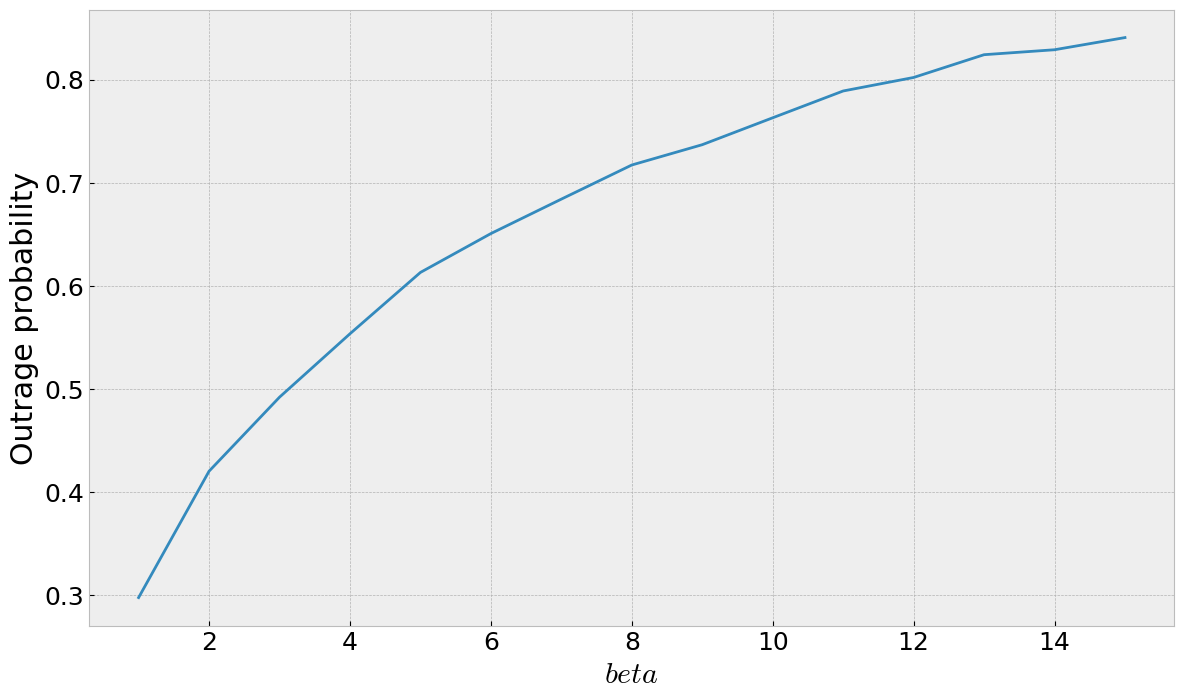

In [13]:
#Beta from 1 to 16
beta = range(1, 16)
n_trials = 10000

#alpha 4
suc_a4 = []
suc_a4 = [suc_prob(d=1, beta=i, alpha=4, L=10, mean_poisson=10, trials=n_trials) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(beta, np.ones(15)- suc_a4)
plt.xlabel("$beta$")
plt.ylabel("Outrage probability")
plt.show()


(b) Consider that the threshold $\beta$ is related to the channel capacity $\log_2(1+\beta)$ by treating the "interference as noise". This value indicates the maximum achieved spectral efficiency by the link in bits/s/Hz. Plot $\log_2(1+\beta)$ as a function of $\beta$, also from 1 to 15.

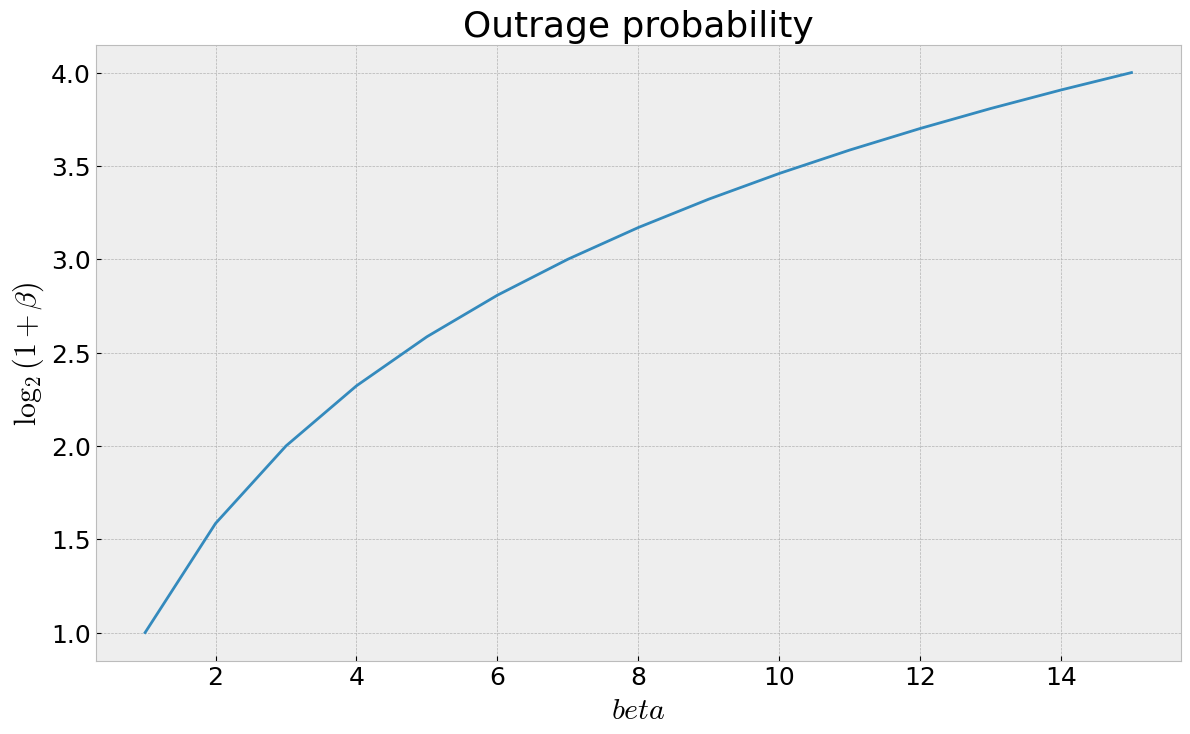

In [9]:
#b

log_beta = [np.log2(1+i) for i in beta]

#no need update the trials and rcparams as they are constant
plt.figure(figsize=(14,8))
plt.plot(beta, log_beta)
plt.title("Outrage probability")
plt.xlabel("$beta$")
plt.ylabel("$\log_2({1 + \\beta})$")
plt.show()

(c) Discuss the trade-off involved in the outage probability and the spectral efficiency that is controlled by the threshold $\beta$.

They acts as relative curve meaning that the outrage probability and the spectral efficiency increase while $\beta$ increase. So it is important to determine $\beta$ and balance the spectral efficiency and the outrage probability based on the network requirements. 